<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


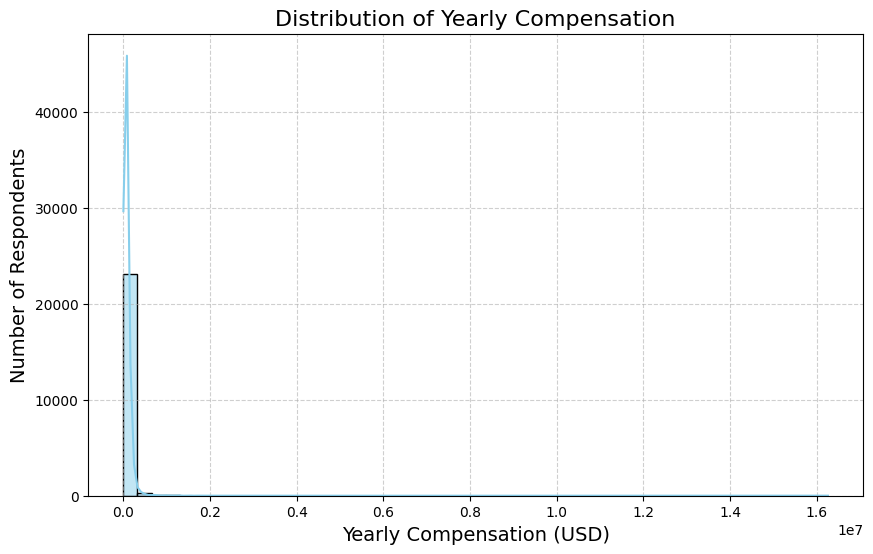

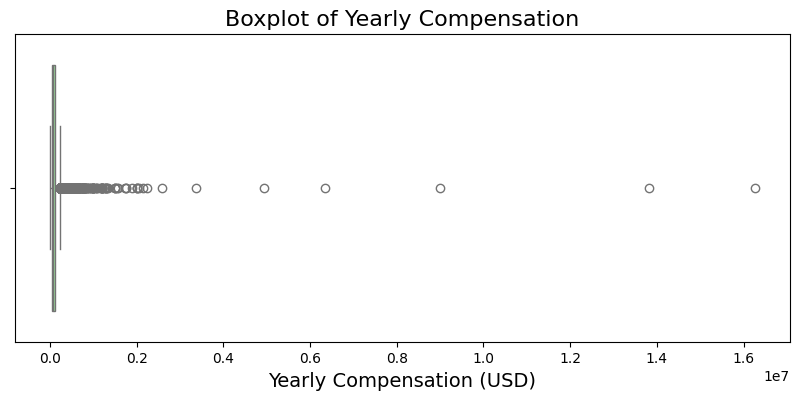

In [3]:
## Write your code here

# Step 3: Analyze and Visualize Compensation Distribution

# Drop missing or invalid values from the compensation column
comp_data = df['ConvertedCompYearly'].dropna()

# --- Histogram with KDE ---
plt.figure(figsize=(10, 6))
sns.histplot(comp_data, bins=50, kde=True, color='skyblue')

plt.title('Distribution of Yearly Compensation', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Boxplot ---
plt.figure(figsize=(10, 4))
sns.boxplot(x=comp_data, color='lightgreen')

plt.title('Boxplot of Yearly Compensation', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here

# Step 4: Calculate Median Compensation for Full-Time Employees

# Filter data for full-time employees
full_time = df[df['Employment'] == 'Employed, full-time']

# Drop missing values in compensation
full_time_comp = full_time['ConvertedCompYearly'].dropna()

# Calculate median compensation
median_comp = full_time_comp.median()

print("Median Yearly Compensation for Full-Time Employees: ${:,.2f}".format(median_comp))

Median Yearly Compensation for Full-Time Employees: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



Summary (ordered by median):


,count,median,q1,q3
Country,,,,
United States of America,4677,143000.0,101000.0,190000.0
Israel,221,113334.0,80953.0,145715.0
Switzerland,386,111417.0,89134.0,142614.0
Singapore,55,103482.0,75578.5,172394.5
Australia,510,95465.5,72673.0,118919.0
Ireland,121,91295.0,59073.0,123517.0
Denmark,212,89137.0,70417.0,115202.0
Canada,871,87231.0,65424.0,116309.0
United Kingdom of Great Britain and Northern Ireland,1391,84076.0,58598.0,121018.0


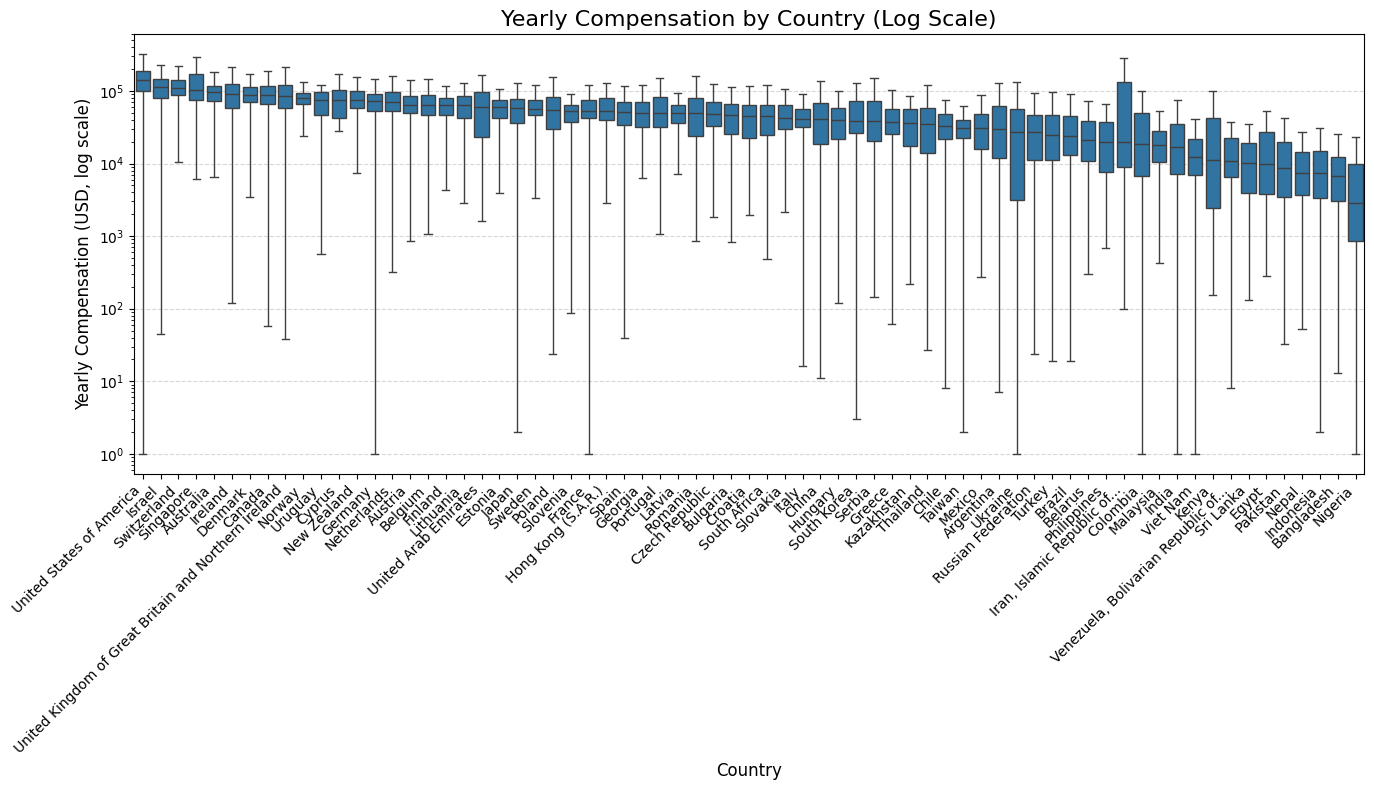

In [5]:
## Write your code here

# Step 5: Analyzing Compensation Range and Distribution by Country

import numpy as np

# --- Clean & prepare data ---
comp_cols = ['Country', 'ConvertedCompYearly']
comp_df = df[comp_cols].dropna()
comp_df = comp_df[comp_df['ConvertedCompYearly'] > 0]  # keep positive values only

# Keep countries with a reasonable sample size (change threshold if needed)
min_responses = 30
country_counts = comp_df['Country'].value_counts()
kept_countries = country_counts[country_counts >= min_responses].index

# If too few pass the threshold, fall back to top 10 by count
if len(kept_countries) < 5:
    kept_countries = country_counts.head(10).index

filtered_df = comp_df[comp_df['Country'].isin(kept_countries)]

# Order countries by median compensation (descending)
country_medians = (
    filtered_df.groupby('Country')['ConvertedCompYearly']
    .median()
    .sort_values(ascending=False)
)
ordered_countries = country_medians.index.tolist()

# --- Optional: compute a quick summary table (count, median, IQR) ---
summary_by_country = (
    filtered_df.groupby('Country')['ConvertedCompYearly']
    .agg(count='count',
         median='median',
         q1=lambda s: np.percentile(s, 25),
         q3=lambda s: np.percentile(s, 75))
    .loc[ordered_countries]
)
print("Summary (ordered by median):")
display(summary_by_country.head(10))  # top 10 countries by median

# --- Box plot by country (log scale for readability) ---
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=filtered_df,
    x='Country',
    y='ConvertedCompYearly',
    order=ordered_countries,
    showfliers=False  # hide extreme points to emphasize IQR
)

plt.yscale('log')  # compensation is typically right-skewed
plt.title('Yearly Compensation by Country (Log Scale)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Yearly Compensation (USD, log scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [8]:
# Step 6: Removing Outliers from the Dataset

# Use the IQR method to remove outliers from ConvertedCompYearly
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outlier values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the main DataFrame to keep only rows within bounds and non-null compensation
df_refined = df[
    (df['ConvertedCompYearly'].notnull()) &
    (df['ConvertedCompYearly'] >= lower_bound) &
    (df['ConvertedCompYearly'] <= upper_bound)
].copy()

print(f"Rows before outlier removal: {len(df)}")
print(f"Rows after outlier removal: {len(df_refined)}")
df_refined.head()

Rows before outlier removal: 65437
Rows after outlier removal: 22457


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


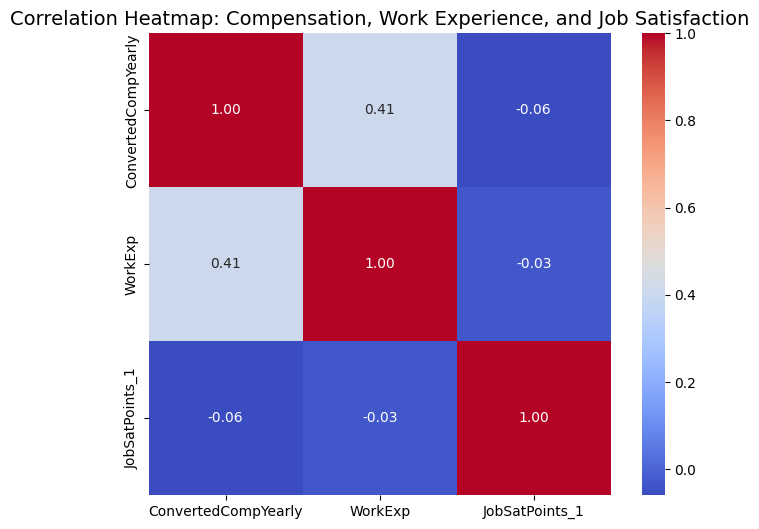

In [9]:
# Step 7: Finding Correlations Between Key Variables

# Select relevant columns from the refined dataset
corr_cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
corr_df = df_refined[corr_cols].dropna()

# Calculate correlation matrix
corr_matrix = corr_df.corr(method='pearson')

print("Correlation Matrix:")
print(corr_matrix)

# --- Visualization: Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)

plt.title("Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction", fontsize=14)
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


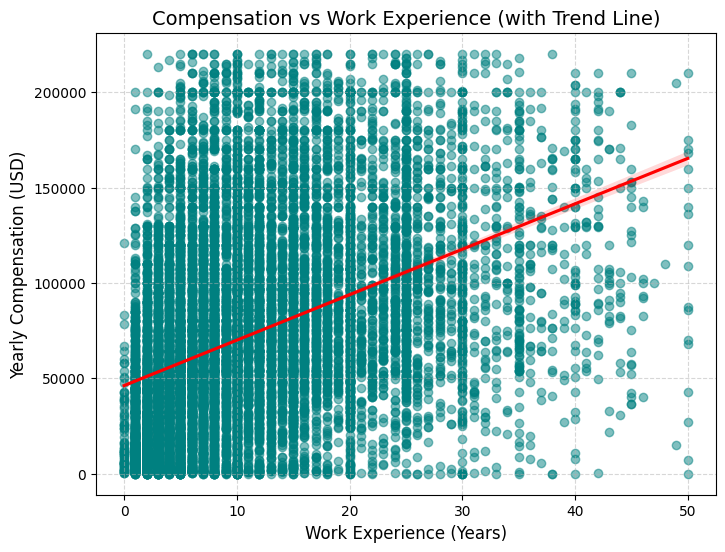

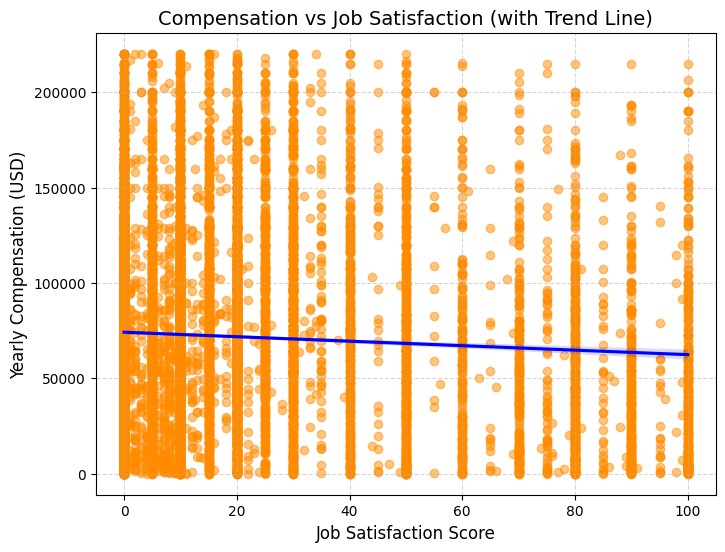

In [10]:
## Write your code here
# Step 8: Scatter Plot for Correlations with Regression Lines

# --- Compensation vs Work Experience ---
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_refined,
    x='WorkExp',
    y='ConvertedCompYearly',
    scatter_kws={'alpha':0.5, 'color':'teal'},
    line_kws={'color':'red'}
)
plt.title("Compensation vs Work Experience (with Trend Line)", fontsize=14)
plt.xlabel("Work Experience (Years)", fontsize=12)
plt.ylabel("Yearly Compensation (USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Compensation vs Job Satisfaction ---
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_refined,
    x='JobSatPoints_1',
    y='ConvertedCompYearly',
    scatter_kws={'alpha':0.5, 'color':'darkorange'},
    line_kws={'color':'blue'}
)
plt.title("Compensation vs Job Satisfaction (with Trend Line)", fontsize=14)
plt.xlabel("Job Satisfaction Score", fontsize=12)
plt.ylabel("Yearly Compensation (USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
